In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import percentileofscore

In [3]:
sales = pd.read_csv('../data/read_summarized_sales_clean.csv')
gdp = pd.read_csv('../data/read_gdp_sector_clean.csv')
gdp_pivoted = pd.read_csv('../data/read_gdp_sector_pivot_clean.csv')
cci = pd.read_csv('../data/read_cci_clean.csv')
rates = pd.read_csv('../data/read_fed_funds_rate_clean.csv')
jobs = pd.read_csv('../data/read_nonfarm_jobs_clean.csv')
fuel = pd.read_csv('../data/read_jet_fuel_clean.csv')
unemployment = pd.read_csv('../data/read_unemployment_rate_clean.csv')

In [7]:
year_list = [2021, 2022, 2023, 2024]
jobs = jobs[jobs['Year'].isin(year_list)]

In [9]:
jobs.head()

,Year-Month,Year,New_Jobs (k),New_Jobs
24,2021-Apr,2021,319,465000
25,2021-Aug,2021,465,243000
26,2021-Dec,2021,566,210000
27,2021-Feb,2021,527,78000
28,2021-Jan,2021,398,307000


**Revenue**

In [11]:
sales = sales[sales['Total Rev'] > 0]
sales = sales[sales['Year-Qtr'] != '2022-Q4']
#lower_percentile = sales['Total Rev'].quantile(0.10)
#upper_percentile = sales['Total Rev'].quantile(0.90)
#sales = sales[(sales['Total Rev'] >= lower_percentile) & (sales['Total Rev'] <= upper_percentile)]

In [13]:
sales['Sales Percentile'] = sales['Total Rev'].apply(lambda x: percentileofscore(sales['Total Rev'], x))
sales = sales[(sales['Sales Percentile'] >= 1) & (sales['Sales Percentile'] <= 70)]
sales.head()

,Year,Month,Qtr,Year-Month,Year-Qtr,Customer,S_Cons_Order_Class,Market,Total Rev,Order Count,Sales Percentile
0,2021,Jan,Q1,2021-Jan,2021-Q1,"al-Ahsan, Rashaad",At-Once,Non-Profit,5739.30,1,69.906791
1,2021,Jan,Q1,2021-Jan,2021-Q1,"al-Fahmy, Haazim",At-Once,Prof Serv,660.00,1,25.294845
3,2021,Jan,Q1,2021-Jan,2021-Q1,"al-Hamed, Zeena",In-Stock,Food/Bev,793.45,2,28.999429
4,2021,Jan,Q1,2021-Jan,2021-Q1,"al-Hamed, Zeena",In-Stock,General,286.25,1,13.781625
6,2021,Jan,Q1,2021-Jan,2021-Q1,"al-Hossain, Muzaina",At-Once,Local,1207.50,1,37.473844


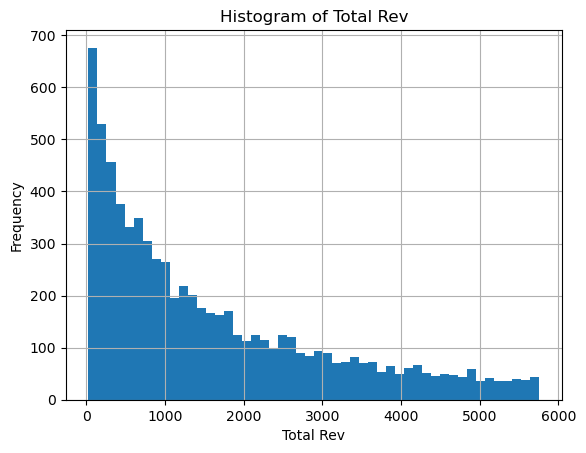

In [15]:
sales['Total Rev'].hist(bins=50)  


plt.title('Histogram of Total Rev')
plt.xlabel('Total Rev')
plt.ylabel('Frequency')
plt.show()

In [17]:
month_rev = sales.groupby('Year-Month').agg({
    'Total Rev': 'sum',
    'Order Count': 'sum'
}).reset_index()
qtr_rev = sales.groupby('Year-Qtr').agg({
    'Total Rev': 'sum',
    'Order Count': 'sum'
}).reset_index()

In [19]:
month_rev.head()

,Year-Month,Total Rev,Order Count
0,2021-Apr,229073.78,667
1,2021-Aug,307450.58,1172
2,2021-Dec,304020.17,1025
3,2021-Feb,236296.40,906
4,2021-Jan,247269.17,757


In [21]:
qtr_rev.head()

,Year-Qtr,Total Rev,Order Count
0,2021-Q1,678392.51,2360
1,2021-Q2,752678.44,2494
2,2021-Q3,882962.33,3029
3,2021-Q4,837459.86,2551
4,2022-Q1,763207.81,2604


**Consumer Confidence Index**

In [24]:
cci.head()

,Category,Year,Month,Year-Month,CCI
0,1/1/2021,2021,Jan,2021-Jan,99.25391
1,2/1/2021,2021,Feb,2021-Feb,99.39012
2,3/1/2021,2021,Mar,2021-Mar,99.74757
3,4/1/2021,2021,Apr,2021-Apr,99.98598
4,5/1/2021,2021,May,2021-May,99.92869


In [26]:
cci_rev = pd.merge(cci, month_rev, on = 'Year-Month')
cci_rev = cci_rev[['Year-Month','CCI', 'Total Rev', 'Order Count']]
cci_rev['Year-Month'] = pd.to_datetime(cci_rev['Year-Month'], format='%Y-%b')
cci_rev.head()

,Year-Month,CCI,Total Rev,Order Count
0,2021-01-01,99.25391,247269.17,757
1,2021-02-01,99.39012,236296.40,906
2,2021-03-01,99.74757,194826.94,697
3,2021-04-01,99.98598,229073.78,667
4,2021-05-01,99.92869,260719.13,994


In [28]:
cci_rev[['CCI', 'Total Rev']].corr()

,CCI,Total Rev
CCI,1.000000,-0.301237
Total Rev,-0.301237,1.000000


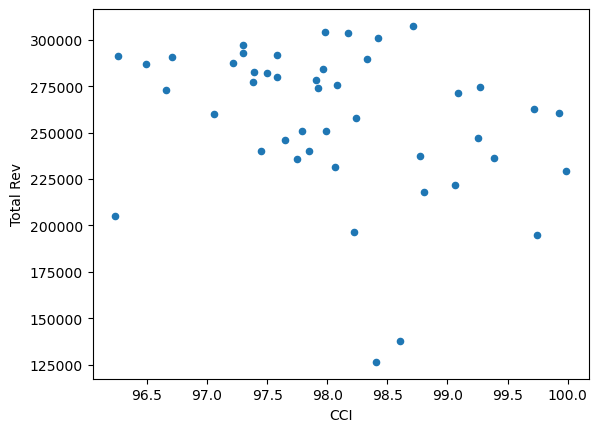

In [30]:
cci_rev.plot(kind="scatter", x="CCI", y="Total Rev");

In [32]:
# plt.figure(figsize=(10, 6))

# # cci line
# plt.plot(cci_rev['Year-Month'], cci_rev['CCI'], label='CCI', color='b', marker='o')

# # total rev line
# plt.plot(cci_rev['Year-Month'], cci_rev['Total Rev'], label='Total Rev', color='g', marker='x')

# # labs/title
# plt.xlabel('Year-Month')
# plt.ylabel('Values')
# plt.title('CCI and Total Rev Over Time')

# #formatting
# plt.xticks(rotation=45)
# plt.legend()
# plt.tight_layout()
# plt.show()

**Gross Domestic Product by Sector**

In [35]:
gdp.head()

,Category,GDP,Year,Qtr,Year-Qtr
0,"Agriculture, forestry, fishing, and hunting",196.4,2021,Q1,2021-Q1
1,Mining,279.9,2021,Q1,2021-Q1
2,Utilities,386.6,2021,Q1,2021-Q1
3,Construction,995.0,2021,Q1,2021-Q1
4,Manufacturing,2296.3,2021,Q1,2021-Q1


In [37]:
gdp_pivoted.head()

,Year-Qtr,Year-Qtr (Offset 1),Year-Qtr (Offset 2),Accommodation and food services,"Agriculture, forestry, fishing, and hunting",Air transportation,"Arts, entertainment, and recreation",Construction,"Educational services, health care, and social assistance",Federal,...,Rail transportation,Retail trade,State and local,Transit and ground passenger transportation,Truck transportation,Utilities,Warehousing and storage,Water transportation,Wholesale trade,Grand Total
0,2021-Q1,2021-Q2,2021-Q3,575.3,196.4,62.8,191.0,995.0,1963.2,884.8,...,43.4,1479.9,1871.3,40.4,215.4,386.6,93.7,13.6,1364.0,22656.9
1,2021-Q2,2021-Q3,2021-Q4,685.3,234.7,88.4,205.7,999.5,1980.8,895.9,...,44.4,1553.8,1893.2,45.1,226.2,375.3,98.1,17.6,1395.8,23368.8
2,2021-Q3,2021-Q4,2022-Q1,745.4,244.4,110.6,223.1,1007.5,2013.8,904.6,...,44.8,1526.0,1932.9,50.5,230.7,390.9,102.6,21.3,1421.3,23921.9
3,2021-Q4,2022-Q1,2022-Q2,763.7,238.9,122.1,237.2,1044.8,2058.8,915.0,...,48.0,1581.0,1942.1,51.5,249.2,410.3,106.2,25.4,1479.3,24776.8
4,2022-Q1,2022-Q2,2022-Q3,761.7,263.3,123.5,243.3,1079.1,2100.3,928.6,...,48.8,1581.5,1960.9,53.4,255.2,395.5,113.6,22.8,1550.4,25215.3


In [39]:
gdp_rev = pd.merge(gdp_pivoted, qtr_rev , on = 'Year-Qtr')
gdp_rev.head()

,Year-Qtr,Year-Qtr (Offset 1),Year-Qtr (Offset 2),Accommodation and food services,"Agriculture, forestry, fishing, and hunting",Air transportation,"Arts, entertainment, and recreation",Construction,"Educational services, health care, and social assistance",Federal,...,State and local,Transit and ground passenger transportation,Truck transportation,Utilities,Warehousing and storage,Water transportation,Wholesale trade,Grand Total,Total Rev,Order Count
0,2021-Q1,2021-Q2,2021-Q3,575.3,196.4,62.8,191.0,995.0,1963.2,884.8,...,1871.3,40.4,215.4,386.6,93.7,13.6,1364.0,22656.9,678392.51,2360
1,2021-Q2,2021-Q3,2021-Q4,685.3,234.7,88.4,205.7,999.5,1980.8,895.9,...,1893.2,45.1,226.2,375.3,98.1,17.6,1395.8,23368.8,752678.44,2494
2,2021-Q3,2021-Q4,2022-Q1,745.4,244.4,110.6,223.1,1007.5,2013.8,904.6,...,1932.9,50.5,230.7,390.9,102.6,21.3,1421.3,23921.9,882962.33,3029
3,2021-Q4,2022-Q1,2022-Q2,763.7,238.9,122.1,237.2,1044.8,2058.8,915.0,...,1942.1,51.5,249.2,410.3,106.2,25.4,1479.3,24776.8,837459.86,2551
4,2022-Q1,2022-Q2,2022-Q3,761.7,263.3,123.5,243.3,1079.1,2100.3,928.6,...,1960.9,53.4,255.2,395.5,113.6,22.8,1550.4,25215.3,763207.81,2604


In [41]:
gdp_rev[['Air transportation', 'Total Rev']].corr()

,Air transportation,Total Rev
Air transportation,1.000000,0.349922
Total Rev,0.349922,1.000000


In [ ]:
# variables = ['Accommodation and food services',
#              'Agriculture, forestry, fishing, and hunting', 'Air transportation',
#              'Arts, entertainment, and recreation', 'Construction',
#              'Educational services, health care, and social assistance', 'Federal',
#              'Finance, insurance, real estate, rental, and leasing', 'Information',
#              'Manufacturing', 'Mining', 'Other services, except government',
#              'Other transportation and support activities',
#              'Pipeline transportation', 'Professional and business services',
#              'Rail transportation', 'Retail trade', 'State and local',
#              'Transit and ground passenger transportation', 'Truck transportation',
#              'Utilities', 'Warehousing and storage', 'Water transportation',
#              'Wholesale trade', 'Grand Total', 'Total Rev', 'Order Count']

In [43]:
correlations = []


for column in gdp_rev.columns:
    if column != 'Year-Qtr' and column != 'Total Rev':
        correlation = gdp_rev[column].corr(gdp_rev['Total Rev'])
        correlations.append((column, correlation))
        
correlation_all = pd.DataFrame(correlations, columns=['Sector', 'Correlation Coefficient'])
correlation_all.head()

ValueError: could not convert string to float: '2021-Q2'

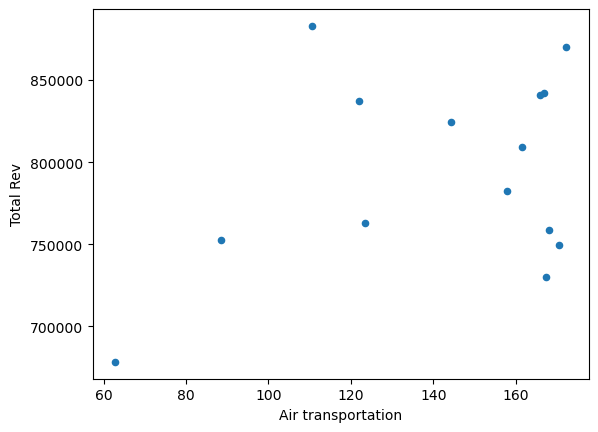

In [45]:
gdp_rev.plot(kind="scatter", x="Air transportation", y="Total Rev");

In [47]:
# fig, ax1 = plt.subplots(figsize=(10, 6))
# ax1.plot(gdp_rev['Year-Qtr'], gdp_rev['Grand Total'], label='GDP', color='b', marker='o')
# ax1.set_xlabel('Year-Month')
# ax1.set_ylabel('GDP', color='b')
# ax1.tick_params(axis='y', labelcolor='b')
# ax2 = ax1.twinx()
# ax2.plot(gdp_rev['Year-Qtr'], gdp_rev['Total Rev'], label='Total Rev', color='g', marker='x')

# ax2.set_ylabel('Total Rev', color='g')
# ax2.tick_params(axis='y', labelcolor='g')
# plt.title('GDP and Total Rev Over Time')

# ax1.set_xticklabels(gdp_rev['Year-Qtr'], rotation=45)
# ax1.legend(loc='upper left')
# ax2.legend(loc='upper right')

# plt.tight_layout()
# plt.show()

Non GDP Variable Merge

In [49]:
display(cci.head())
display(rates.head())
display(jobs.head())
display(fuel.head())
display(unemployment.head())

,Category,Year,Month,Year-Month,CCI
0,1/1/2021,2021,Jan,2021-Jan,99.25391
1,2/1/2021,2021,Feb,2021-Feb,99.39012
2,3/1/2021,2021,Mar,2021-Mar,99.74757
3,4/1/2021,2021,Apr,2021-Apr,99.98598
4,5/1/2021,2021,May,2021-May,99.92869


,Obs_Date,Year,Month,Year-Month,Fed_Fund_Rate
0,1/1/2021,2021,Jan,2021-Jan,0.09
1,2/1/2021,2021,Feb,2021-Feb,0.08
2,3/1/2021,2021,Mar,2021-Mar,0.07
3,4/1/2021,2021,Apr,2021-Apr,0.07
4,5/1/2021,2021,May,2021-May,0.06


,Year-Month,Year,New_Jobs (k),New_Jobs
24,2021-Apr,2021,319,465000
25,2021-Aug,2021,465,243000
26,2021-Dec,2021,566,210000
27,2021-Feb,2021,527,78000
28,2021-Jan,2021,398,307000


,Year,Month,Year-Month,Jet Fuel (Price/Gallon)
0,2021,Jan,2021-Jan,1.420
1,2021,Feb,2021-Feb,1.601
2,2021,Mar,2021-Mar,1.661
3,2021,Apr,2021-Apr,1.669
4,2021,May,2021-May,1.752


,Period,Year,Month,Year-Month,Unemployment
0,M01,2021,Jan,2021-Jan,6.4
1,M02,2021,Feb,2021-Feb,6.2
2,M03,2021,Mar,2021-Mar,6.1
3,M04,2021,Apr,2021-Apr,6.1
4,M05,2021,May,2021-May,5.8


In [51]:
cci = cci[['Year-Month', 'CCI']]
rates = rates[['Year-Month', 'Fed_Fund_Rate']]
jobs = jobs[['Year-Month', 'New_Jobs']]
fuel = fuel[['Year-Month', 'Jet Fuel (Price/Gallon)']]
unemployment = unemployment[['Year-Month', 'Unemployment']]

In [53]:
display(cci.head())
display(rates.head())
display(jobs.head())
display(fuel.head())
display(unemployment.head())

,Year-Month,CCI
0,2021-Jan,99.25391
1,2021-Feb,99.39012
2,2021-Mar,99.74757
3,2021-Apr,99.98598
4,2021-May,99.92869


,Year-Month,Fed_Fund_Rate
0,2021-Jan,0.09
1,2021-Feb,0.08
2,2021-Mar,0.07
3,2021-Apr,0.07
4,2021-May,0.06


,Year-Month,New_Jobs
24,2021-Apr,465000
25,2021-Aug,243000
26,2021-Dec,210000
27,2021-Feb,78000
28,2021-Jan,307000


,Year-Month,Jet Fuel (Price/Gallon)
0,2021-Jan,1.420
1,2021-Feb,1.601
2,2021-Mar,1.661
3,2021-Apr,1.669
4,2021-May,1.752


,Year-Month,Unemployment
0,2021-Jan,6.4
1,2021-Feb,6.2
2,2021-Mar,6.1
3,2021-Apr,6.1
4,2021-May,5.8


In [55]:
display(cci.shape)
display(rates.shape)
display(jobs.shape)
display(fuel.shape)
display(unemployment.shape)

(48, 2)

(48, 2)

(48, 2)

(48, 2)

(48, 2)

In [ ]:
cci
rates
jobs
fuel
unemployment

In [59]:
merged = cci

merged = pd.merge(merged_df, rates, on='Year-Month', how='outer')
merged = pd.merge(merged_df, jobs, on='Year-Month', how='outer')
merged = pd.merge(merged_df, fuel, on='Year-Month', how='outer')
merged = pd.merge(merged_df, unemployment, on='Year-Month', how='outer')

merged_df.head()

,Year-Month,CCI,Fed_Fund_Rate,New_Jobs,Jet Fuel (Price/Gallon),Unemployment
0,2021-Apr,99.98598,0.07,465000,1.669,6.1
1,2021-Aug,98.71161,0.09,243000,1.817,5.1
2,2021-Dec,97.98043,0.08,210000,2.095,3.9
3,2021-Feb,99.39012,0.08,78000,1.601,6.2
4,2021-Jan,99.25391,0.09,307000,1.420,6.4


In [63]:
merged['Year-Month'] = pd.to_datetime(merged['Year-Month'], format='%Y-%b')
merged['Year-Month (Offset 1)'] = (merged['Year-Month'] + pd.DateOffset(months=1)).dt.strftime('%Y-%b')
merged['Year-Month (Offset 2)'] = (merged['Year-Month'] + pd.DateOffset(months=2)).dt.strftime('%Y-%b')
merged.head()

,Year-Month,CCI,Fed_Fund_Rate,New_Jobs,Jet Fuel (Price/Gallon),Unemployment_x,Unemployment_y,Year-Month (Offset 1),Year-Month (Offset 2)
0,2021-04-01,99.98598,0.07,465000,1.669,6.1,6.1,2021-May,2021-Jun
1,2021-08-01,98.71161,0.09,243000,1.817,5.1,5.1,2021-Sep,2021-Oct
2,2021-12-01,97.98043,0.08,210000,2.095,3.9,3.9,2022-Jan,2022-Feb
3,2021-02-01,99.39012,0.08,78000,1.601,6.2,6.2,2021-Mar,2021-Apr
4,2021-01-01,99.25391,0.09,307000,1.420,6.4,6.4,2021-Feb,2021-Mar


In [67]:
column_order = ['Year-Month',
                'Year-Month (Offset 1)',
                'Year-Month (Offset 2)',
                'CCI',
                'Fed_Fund_Rate',
                'New_Jobs',
                'Jet Fuel (Price/Gallon)',
                'Unemployment_x',
                'Unemployment_y']


merged = merged[column_order]
merged.head()

,Year-Month,Year-Month (Offset 1),Year-Month (Offset 2),CCI,Fed_Fund_Rate,New_Jobs,Jet Fuel (Price/Gallon),Unemployment_x,Unemployment_y
0,2021-04-01,2021-May,2021-Jun,99.98598,0.07,465000,1.669,6.1,6.1
1,2021-08-01,2021-Sep,2021-Oct,98.71161,0.09,243000,1.817,5.1,5.1
2,2021-12-01,2022-Jan,2022-Feb,97.98043,0.08,210000,2.095,3.9,3.9
3,2021-02-01,2021-Mar,2021-Apr,99.39012,0.08,78000,1.601,6.2,6.2
4,2021-01-01,2021-Feb,2021-Mar,99.25391,0.09,307000,1.420,6.4,6.4
